# **Global Cyber Threats 2015-2024 data ETL**

## Objectives

- Fetch data from Kaggle and save as raw data
- Transform the data to a clean format
- Load the clean data for further analysis
- Visualize the data to understand trends and patterns

## Inputs

- Kaggle dataset: [Global Cyber Threats 2015-2024](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024?resource=download)
- Python libraries: pandas, numpy, matplotlib, seaborn, plotly

In [1]:
import pandas as pd
import numpy as np

#raw data import and table sample

In [2]:
df = pd.read_csv(r"C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends\global_cybersecurity_threats_2015-2024.csv")
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [3]:
# check for missing values
missing_values = df.isnull().sum()

In [4]:
# check column data types
column_types = df.dtypes

In [5]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


#as no missing values or wrong data types are found, there is no need to replace, convert or drop functions

In [6]:
#check for duplicates
df.drop_duplicates(inplace=True)

#save clean data

## Outputs: 

In [7]:
df.to_csv(r"C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv", index=False)

In [8]:
# preview saved data
cleaned_df = pd.read_csv("C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv")
cleaned_df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# Hypothesis 

#H1. DDos and Phishing are the most frequent type of attacks

#H2. IT and Banking are the most targeted industries

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [10]:
cleaned_df = pd.read_csv("C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv")

In [100]:
# temporal trend of cyber threats
yearly_trend = cleaned_df.groupby('Year').size().reset_index(name='Incident Count')
fig = px.line(yearly_trend, x='Year', y='Incident Count', title='Yearly Trend of Cyber Threats')
fig.update_layout(xaxis_title='Year', yaxis_title='Incident Count')
fig.show()

# average financial loss over time
avg_loss = cleaned_df.groupby('Year')['Financial Loss (in Million $)'].mean().reset_index()
fig = px.line(avg_loss, x='Year', y='Financial Loss (in Million $)', title='Average Financial Loss Over Time')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Financial Loss (Million $)')
fig.show()



#Incidents have an increasing trend 2015-2017, they drop in 2019 and are somehow linear from 2020 onwards

#financial losses, instead, exhibit a high variability with high average per incident loss compared to a more linear data breaches

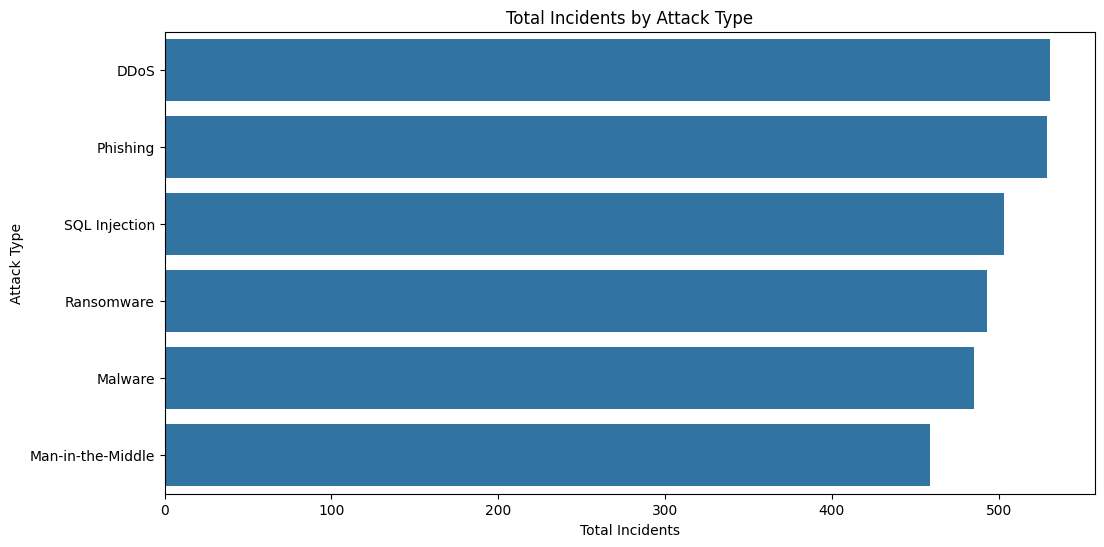

In [84]:
# attack types total incidents
attack_types = cleaned_df['Attack Type'].value_counts().reset_index()
attack_types.columns = ['Attack Type', 'Total Incidents']
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_types, x='Total Incidents', y='Attack Type')
plt.title('Total Incidents by Attack Type')
plt.xlabel('Total Incidents')
plt.ylabel('Attack Type')
plt.show()





#Phishing & DDoS are the most frequent attack types

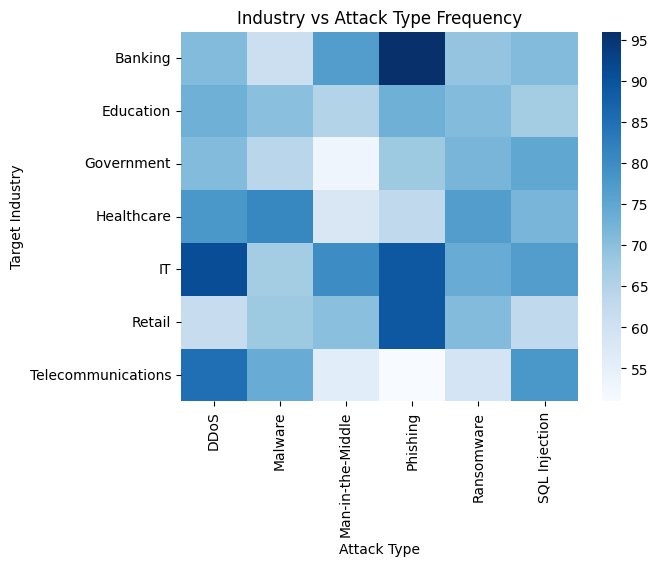

In [14]:
# heatmap of attack types by industry
ct = pd.crosstab(df['Target Industry'], df['Attack Type'])
sns.heatmap(ct, cmap="Blues")
plt.title("Industry vs Attack Type Frequency")
plt.show()

#it clearly shows the correlation between DDOS and Phishing attacks prevalence on IT, Telecomm and Banking sectors respectively 

In [61]:
# affected users by industry chart
fig = px.bar(df, x='Target Industry', y='Number of Affected Users',
             title='Affected Users by Industry', color='Attack Type',
                labels={'Number of Affected Users': 'Affected Users', 'Target Industry': 'Industry'})
fig.update_layout(xaxis_title='Industry', yaxis_title='Affected Users')
fig.show()

# financial loss by security sulnerability type
fig = px.box(df, x='Security Vulnerability Type', y='Financial Loss (in Million $)',
               title='Financial Loss by Security Vulnerability Type')
fig.update_layout(xaxis_title='Security Vulnerability Type', yaxis_title='Financial Loss (Million $)')
fig.show()

# incident resolution time by attack type
fig = px.box(df, x='Attack Type', y='Incident Resolution Time (in Hours)',
               title='Incident Resolution Time by Attack Type')
fig.update_layout(xaxis_title='Attack Type', yaxis_title='Resolution Time (Hours)')
fig.show()








#IT and Banking sectors have the highest number of attacks and financial loss, while Public Sector (Education+Government) and Healthcare rank top in affected users, despite a moderate financial loss


#Social engineering and attacks exploiting zero-day vulnerabilities incur the highest average losses, outranking weak-password or unpatched-software incidents

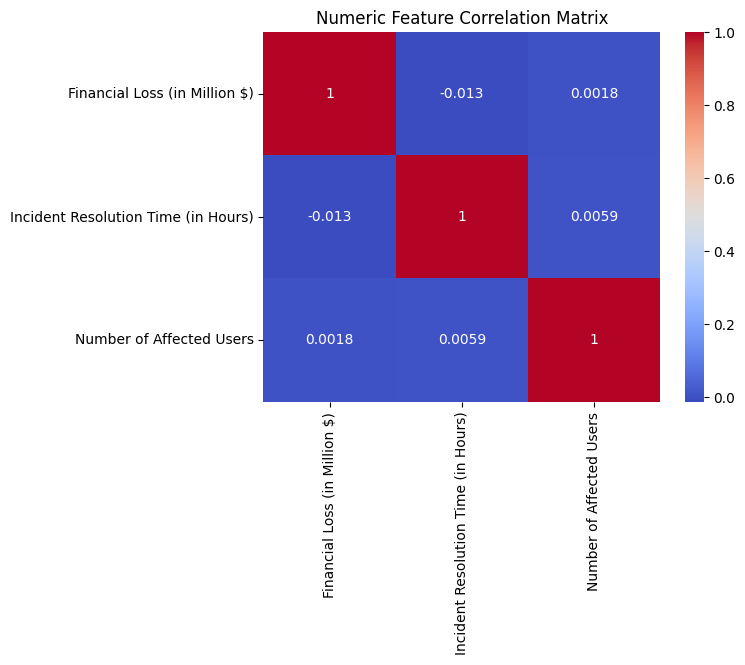

In [15]:
#correlation map
corr = df[['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)', 'Number of Affected Users']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Matrix")
plt.show()

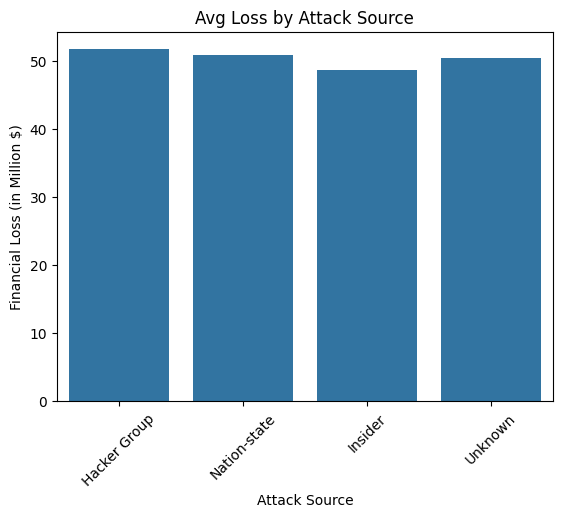

In [82]:
#attack source vs severity
sns.barplot(data=df, x='Attack Source', y='Financial Loss (in Million $)', errorbar=None)
plt.xticks(rotation=45)
plt.title("Avg Loss by Attack Source")
plt.show()

#we can see that hacker groups and nation-state attacks come first in terms of finnacial loss

In [17]:
!pip install --upgrade nbformat

#update nbformat and restart kernel

In [ ]:
#finnacial loss by country boxplot
cleaned_df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')

fig = px.box(df, x='Country', y='Financial Loss (in Million $)',
             title='Financial Loss Distribution by Country')
fig.update_layout(xaxis_title='Country', yaxis_title='Loss (Million $)')
fig.show()

In [33]:
cleaned_df['Number of Affected Users'] = pd.to_numeric(cleaned_df['Number of Affected Users'], errors='coerce')

fig = px.scatter(df, x='Number of Affected Users', y='Financial Loss (in Million $)',
                 color='Attack Type', hover_data=['Country'],
                 title='Users Affected vs Financial Loss by Attack Type')
fig.show()

In [69]:
fig = px.treemap(
    df_sunburst,
    path=['Attack Source', 'Country', 'Target Industry'],
    title='Treemap: Attack Source → Country → Target Industry',
    color='Attack Source'
)

fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

#nation-state actors are predominant in countries like Japan, while insider threats are frequent in India, and hacker groups dominate in the UK

In [74]:
geo_data = cleaned_df.groupby('Country').agg({
    'Attack Type': 'count',
    'Financial Loss (in Million $)': 'sum'
}).reset_index()
geo_data.columns = ['Country', 'Incident Count', 'Financial Loss ($M)']

fig = px.choropleth(geo_data,
                    locations='Country',
                    locationmode='country names',
                    color='Incident Count',
                    hover_name='Country',
                    hover_data={'Financial Loss ($M)': ':.2f'},
                    color_continuous_scale='YlOrRd',
                    title='Global Cybersecurity Attacks by Country')
fig.update_geos(showframe=False, showcoastlines=True)
fig.show()

while the attck types are quite evenly spread, UK leads in number of attacks and financial loss, followed by US, Germany and Australia

In [79]:
kruskal_df = cleaned_df.dropna(subset=['Attack Type', 'Incident Resolution Time (in Hours)'])
top_attacks = kruskal_df['Attack Type'].value_counts().nlargest(5).index
kruskal_df = kruskal_df[kruskal_df['Attack Type'].isin(top_attacks)]

# Prepare data groups for Kruskal-Wallis test
groups = [
    kruskal_df[kruskal_df['Attack Type'] == attack]['Incident Resolution Time (in Hours)']
    for attack in top_attacks
]

# Perform Kruskal–Wallis H-test
statistic, p_value = kruskal(*groups)

# Output result
print("Kruskal–Wallis H-test: Resolution Time by Attack Type")
print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("✅ Statistically significant differences found between Attack Type.")
else:
    print("❌ No statistically significant differences found.")

Kruskal–Wallis H-test: Resolution Time by Attack Type
Test statistic: 1.8461
P-value: 7.6404e-01
❌ No statistically significant differences found.


#as the statistical test is not relevant, given the size of the data set we can drill down into boxplot visaul results

In [80]:
# attack types vs resolution time boxplot
fig = px.box(kruskal_df, x='Attack Type', y='Incident Resolution Time (in Hours)',
                title='Incident Resolution Time by Attack Type',
                labels={'Incident Resolution Time (in Hours)': 'Resolution Time (Hours)', 'Attack Type': 'Attack Type'})
fig.update_layout(xaxis_title='Attack Type', yaxis_title='Resolution Time (Hours)')
fig.show()

#Ransomware require longer resolution times than average attacks

# FINDINGS summary:
* Incidents have an increasing trend 2015-2018 and are quite linear from 2020 onwards
* Financial losses, instead, exhibit a high variability with high average per incident loss compared to a more linear data breaches
* Phishing & DDoS are the most frequent attack types
* IT and Banking sectors have the highest number of attacks and financial loss, while Public Sector (Education+Government) and Healthcare rank top in affected users, despite a moderate financial loss
* Social engineering and attacks exploiting zero-day vulnerabilities incur the highest average losses, outranking weak-password or unpatched-software incidents
* Nation-state actors are predominant in countries like Japan, while insider threats are frequent in India, and hacker groups dominate in the UK
* United Kingdom shows the highest loss at $ 16.5M while China ranks last with $13.7M
* Ransomware require longer resolution times than average attacks


